# Chapter2 퍼셉트론

- 왜 이 오래된 알고리즘을 배우는가?? : 퍼셉트론이 딥러닝의 기원이 되는 알고리즘이기 때문 

  => 퍼셉트론의 구조를 배우는 것은 딥러닝을 이해하는데 도움이 된다

## 2.1 퍼셉트론이란??

[문과생도 이해하는 딥러닝 (1) - 퍼셉트론 Perceptron](https://sacko.tistory.com/10)

[퍼셉트론(Perceptron) 개념 이해](https://heytech.tistory.com/332)

- 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다. 전류가 전선을 타고 흐르는 전자를 내보내듯 퍼셉트론 신호도 흐름을 만들고 정보를 앞으로 전달한다. 1은 신호가 흐른다 / 0은 신호가 흐르지 않는다

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Flr1or%2FbtrcAbcxgd4%2FyqPvX998ems3gFLZBGXzBK%2Fimg.png)

- x1,x2는 입력 신호, y는 출력 신호, w1, w2는 가중치(weight), 원은 노드=뉴런

- 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다.

- 뉴런에서 보내온 신호의 총합이 정해진 한계(임계값)를 넘어설 때만 1을 출력(=뉴런이 활성화한다)

- 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여하는데 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용한다

  => **가중치가 클수록 해당 신호가 그만큼 더 중요함을 의미한다**



## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

- AND 게이트  
  ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F99F746505B98A118374FF4)

- AND 게이트는 입력이 둘이고 출력은 하나

- 두 입력이 모두 1일때만 1을 출력하고 그외에는 0을 출력

- AND게이트를 퍼셉트론으로 표현하려면?? 

  => AND게이트 진리표대로 작동하게 하는 가중치(w1, w2)와 임계값을 설정하면 된다

  => 그럼 어떤 값으로 설정해야 할까??

  ex) (0.5, 0.5, 0.7) 
       (0,0) = 0*0.5 + 0*0.5 = 0 < 0.7 >>> 0
       (1,0) = 1*0.5 + 0*0.5 = 0.5 < 0.7 >>> 0
       (0,1) = 0*0.5 + 1*0.5 = 0.5 < 0.7 >>> 0
       (1,1) = 1*0.5 + 1*0.5 = 1 > 0.7 >>> 1



In [ ]:
# 위의 설명만 보고 코드 안보고 구현해보기
# 0,0,0,1 이 나오면 게이트 정상 작동
def AND_gate(x1,x2): # 입력값 x1, x2
    # w1, w2, h = 0.5, 0.5, 0.7 # 가중치 w1, w2 / 임계값 h
    w1, w2, h = 1.0, 1.0, 1.0 # 가중치 2개 합이 임계값보다 높기만 하면 모두 가능??
    if x1*w1 + x2*w2 <= h: # 입력값과 가중치가 곱해져 더해진 가중합이 임계값보다 낮으면 0, 높으면 1
        print(0)
    else: # else?? elif??
        print(1)

AND_gate(0,0), AND_gate(1,0), AND_gate(0,1), AND_gate(1,1)

0
0
0
1


(None, None, None, None)

### 2.2.2 NAND 게이트와 OR 게이트

- NAND 게이트

  ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile8.uf.tistory.com%2Fimage%2F99B11F495B98A12C01E915)

NAND는 Not AND를 의미하며 동작은 AND게이트의 출력을 뒤집은 것이 된다.

=> AND 게이트의 정반대 출력이 나온다.

=> 가중치와 임계값들을 어떻게 조합해야 NAND게이트가 만들어질까??

In [ ]:
# 출력이 반대 => 매개변수 값들도 반대??
def NAND_gate(x1, x2):
    # w1, w2, h = -0.5, -0.5, -0.7
    # w1, w2, h = -0.4, -0.4, -0.7 # 두개 합이 임계값보다 작으면??
    w1, w2, h = -0.3, -0.3, -0.5 
    sum = x1*w1 + x2*w2
    if sum <= h: # 임계값을 어디쪽에 포함하는게 맞나??
        return 0
    else:
        return 1

# 1, 1, 1, 0
NAND_gate(0,0), NAND_gate(1,0), NAND_gate(0,1), NAND_gate(1,1)

(1, 1, 1, 0)

- OR 게이트

  ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F998CFD4F5B98A13A32BDD0)

OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로.

In [ ]:
def OR_gate(x1, x2):
    # w1, w2, h = 1.0, 1.0, 0.5
    w1, w2, h = 0.7, 0.7, 0.5 # 둘다 임계값보다 크면 되는듯?? 둘다 1,1 이면 당연히 임계값보다 크고 / 하나가 0이고 하나만 1 곱해져도 0.7로 임계값보다 큼
    sum = x1*w1 + x2*w2
    if sum < h: # 임계값을 어디쪽에 포함하는게 맞나??
        return 0
    else:
        return 1

OR_gate(0,0), OR_gate(1,0), OR_gate(0,1), OR_gate(1,1)

(0, 1, 1, 1)

- 이상과 같이 퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있음을 알았다.

- 여기서 중요한 점은 퍼셉트론 구조는 AND, NAND, OR 게이트 모두 같다는 것이다

  => 세 가지 게이트에서 다른 것은 매개변수(가중치, 임계값) 뿐, 값의 조정에 따라 AND, NAND, OR로 나누어진 것이다.

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [ ]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 # 매개변수 w1, w2, theta는 함수 안에서 초기화
    tmp = x1*w1 + x2*w2 # 가중치를 곱한 입력의 총합
    if tmp <= theta: # 가중합이 임계값보다 낮으면 0을 반환
        return 0
    elif tmp > theta: # 가중합이 임계값을 넘으면 1을 반환
        return 1


In [ ]:
# 0,0,0,1
AND(0,0),AND(1,0),AND(0,1),AND(1,1)

(0, 0, 0, 1)

### 2.3.2 가중치와 편향 도입

![이미지](https://velog.velcdn.com/images/citizenyves/post/ae3c317c-f9d6-47c1-8642-bfc07aa81d62/image.png)

- b(bias) : 편향

- 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 / 그렇지 않으면 0을 출력



In [ ]:
import numpy as np 

x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7
w*x

array([0. , 0.5])

In [ ]:
np.sum(w*x)

0.5

In [ ]:
np.sum(w*x) + b

-0.19999999999999996

### 2.3.3 가중치와 편향 구하기

In [ ]:
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

- 2.3.1에서 사용한 theta가 -b가 되었다.

- 편향은 가중치와 기능이 다르다는 것에 주의하자

  => 가중치는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수

  => 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수

  ex) b가 -0.1이면 가중합이 0.1을 초과하면 뉴런이 활성화되지만 / b가 -20이라면 가중합이 20을 넘지 않으면 활성화되지 않는다 
  
  => 활성화를 위한 요구치가 높아짐

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2]) 
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b 
    if tmp <= 0:
        return 0 
    else:
        return 1 

def OR(x1, x2):
    x = np.array([x1, x2]) 
    w = np.array([0.5, 0.5]) 
    b = -0.2  
    tmp = np.sum(w*x) + b 
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계

- 퍼셉트론을 통해 AND, NAND, OR 3가지 논리 회로를 구현해보았다. 그럼 XOR 게이트는??

### XOR 게이트

- XOR 게이트 : 배타적 논리합이라는 논리 회로

  ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F9973DD505B98A1B7095D3F)

- x1, x2 중 한쪽이 1일때만 1을 출력

  => XOR게이트를 퍼셉트론으로 구현하려면 가중치 매개변수 값을 어떻게 줘야할까??

  => 지금까지의 퍼셉트론으로는 XOR게이트 구현 불가. 왜??

  => 단층 퍼셉트론으로 AND, NAND, OR 게이트는 구현 가능하지만, XOR 게이트는 구현할 수 없다. 퍼셉트론은 아래와 같이 직선 으로 나뉜 두 영역을 만든다. 하지만 XOR은 직선으로 두 영역을 나눌 수 없다.


![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F992152485B98A1C7051CAA)

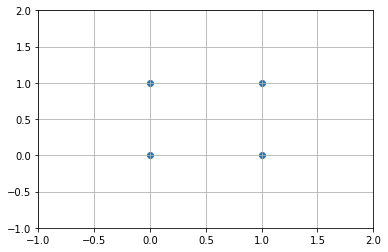

In [ ]:
import matplotlib.pyplot as plt 

x = [0,0,1,1]
y = [0,1,0,1]
plt.scatter(x,y)
plt.grid()
plt.xlim([-1,2])
plt.ylim([-1,2])
plt.show()

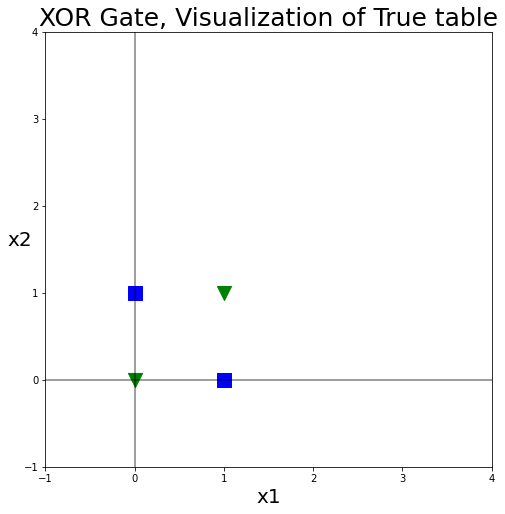

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,8)) # 캔버스 생성
fig.set_facecolor('white')      # 캔버스 색상 설정

plt.title('XOR Gate, Visualization of True table', fontsize = 25)
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.axhline(color = 'k', alpha = 0.5)
plt.axvline(color = 'k', alpha = 0.5)
plt.xlabel("x1", fontsize = 20)
plt.ylabel("x2", fontsize = 20, rotation = 0)

plt.scatter([0, 1], [0, 1], s = 200, c = "green", marker="v")
plt.scatter([0, 1], [1, 0], s = 200, c = "blue", marker="s")

plt.show()


### 2.4.2 선형과 비선형

- 직선이 아니라 곡선이라면 가능

  ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F991D844D5B98A1DE08B4D9)

- 단일 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 있다. 사진처럼의 곡선 표현이 불가능.

- 곡선의 영역을 비선형 영역, 직선의 영역을 선형 영역이라 한다.

## 2.5 다층 퍼셉트론이 출동한다면

- 단일 퍼셉트론으로는 XOR 게이트를 표현할 수 없었지만 다층이라면 얘기가 다르다

- 층을 더 쌓아 XOR을 표현해볼 것이다.

  => 단층 퍼셉트론으로는 XOR 게이트를 표현할 수 없다 = 비선형 영역을 분리할 수 없다

### 2.5.1 기존 게이트 조합하기

- XOR게이트를 만드는 방법 중 하나는 AND, NAND, OR 게이트를 조합하는 방법이다.

<br/>

- AND, NAND, OR 게이트를 조합 

    ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F995729435B98A1FE3DDE2B)

<br/>
<br/>

- XOR 게이트의 진리표

    ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile26.uf.tistory.com%2Fimage%2F990BA8455B98A2152E3B00)

- 왜 XOR은 곡선의 형태가 나올까????

### 2.5.2 XOR 게이트 구현하기

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
# 0,1,1,0
XOR(0,0), XOR(1,0), XOR(0,1), XOR(1,1)

(0, 1, 1, 0)

![이미지](https://upload.wikimedia.org/wikipedia/commons/b/b2/Perceptron_XOR.jpg)

- 앞에서부터 차례로, 0층 / 1층 / 2층
- 가중치를 갖는 층이 2개뿐이므로 2층 퍼셉트론이라 부른다
- 동작을 자세하게 설명하자면
  
  1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보낸다

  2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력한다 

## 2.6 NAND에서 컴퓨터까지

- 다층 퍼셉트론을 통해 => 덧셈처리부터 진수변환, 컴퓨터까지 표현 가능

- NAND 게이트의 조합만으로 컴퓨터가 수행하는 일을 재현할 수 있다. = 퍼셉트론으로 컴퓨터를 표현할 수 있다

## 2.7 정리

- 퍼셉트론은 입출력을 갖춘 알고리즘. 입력을 주면 정해진 규칙에 따른 값을 출력한다
- 퍼셉트론에서는 가중치와 편향을 매개변수로 설정한다
- 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다